<a href="https://colab.research.google.com/github/maxkkessler/CSE-4502-Projects/blob/main/WA3_SVM_%5Bmkk17004%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starter code for SVM assignment.

In [ ]:
# Load the libaries dataset
# When you load the datasets, please select both training and testing files at "Choose Files" and click "Open"
# You could add other necessary libraries here
import pandas as pd
import numpy as np
from google.colab import files

import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,  classification_report
# If you would like to delete the files uploaded, go to Runtime --> Factory reset runtime
uploaded = files.upload()

Saving validation_data_new_7dim.csv to validation_data_new_7dim.csv
Saving training_data_new_7dim.csv to training_data_new_7dim.csv


In [ ]:
# Read the corresponding csv files
train_set = pd.read_csv("training_data_new_7dim.csv") 
valid_set = pd.read_csv("validation_data_new_7dim.csv") 

# You can try standard scaler instead if you want
min_max_scaler = preprocessing.MinMaxScaler()
train_set = min_max_scaler.fit_transform(train_set)
valid_set = min_max_scaler.fit_transform(valid_set)
train_set = pd.DataFrame(train_set)
valid_set = pd.DataFrame(valid_set)

In [ ]:
# Preview the processed training data
train_set

,0,1,2,3,4,5,6,7
0,0.156250,0.666667,0.416667,0.153846,0.545455,0.416667,0.419355,1.0
1,0.093750,0.629630,0.416667,0.169231,0.545455,0.333333,0.290323,1.0
2,0.171875,0.518519,0.458333,0.138462,0.393939,0.333333,0.322581,1.0
3,0.203125,0.518519,0.125000,0.215385,0.363636,0.194444,0.451613,1.0
4,0.171875,0.333333,0.458333,0.200000,0.363636,0.444444,0.225806,1.0
...,...,...,...,...,...,...,...,...
795,0.531250,0.666667,0.750000,0.492308,0.606061,0.555556,0.483871,0.0
796,0.546875,0.592593,0.708333,0.569231,0.818182,0.722222,0.548387,0.0
797,0.578125,0.740741,0.708333,0.538462,0.757576,0.694444,0.516129,0.0
798,0.546875,0.814815,0.875000,0.569231,0.848485,0.611111,0.741935,0.0


In [ ]:
# Preview the processed validation data
valid_set

,0,1,2,3,4,5,6,7
0,0.169492,0.666667,0.629630,0.220339,0.555556,0.533333,0.50000,1.0
1,0.135593,0.708333,0.407407,0.220339,0.629630,0.500000,0.43750,1.0
2,0.118644,0.791667,0.592593,0.288136,0.703704,0.500000,0.43750,1.0
3,0.118644,0.791667,0.555556,0.237288,0.629630,0.433333,0.28125,1.0
4,0.067797,0.750000,0.370370,0.237288,0.629630,0.466667,0.28125,1.0
...,...,...,...,...,...,...,...,...
195,0.389831,0.416667,0.629630,0.491525,0.000000,0.300000,0.46875,0.0
196,0.338983,0.583333,0.666667,0.508475,0.814815,0.266667,0.59375,0.0
197,0.372881,0.541667,0.629630,0.474576,0.777778,0.233333,0.62500,0.0
198,0.406780,0.541667,0.666667,0.559322,0.740741,0.266667,0.59375,0.0


In [ ]:
train_x,train_y=train_set.iloc[:,0:7],train_set.iloc[:,7]
valid_x,valid_y=valid_set.iloc[:,0:7],valid_set.iloc[:,7]

# Training data
train_x=train_x.to_numpy()
train_y=train_y.to_numpy()
valid_x=valid_x.to_numpy()
valid_y=valid_y.to_numpy()

In [ ]:
fake = [0 for i in range(200)]
fake = np.array(fake)
print(fake)
print(valid_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.

**Question 1(a)** (10 marks)

In [ ]:
# Your codes go from here
from sklearn.svm import SVC
from sklearn import metrics

clf = SVC(kernel='linear', C = 1)

clf.fit(train_x, train_y)

pred_y = clf.predict(valid_x)

accuracy = metrics.accuracy_score(valid_y, pred_y)
print("Accuracy:", accuracy)


Accuracy: 1.0


**Question 1(b)** (5 marks)

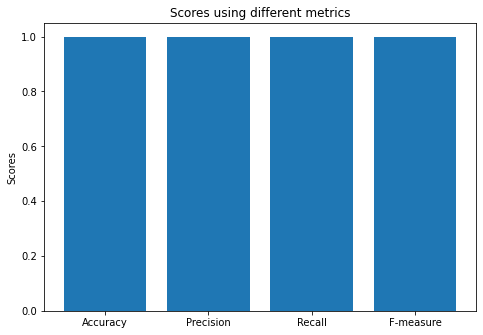

In [ ]:
# Your codes go from here


precision = metrics.precision_score(valid_y, pred_y)
recall = metrics.recall_score(valid_y, pred_y)
f_measure = (2*recall*precision) / (recall+precision)

x = ["Accuracy", "Precision", "Recall", "F-measure"]
y = [accuracy, precision, recall, f_measure]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
ax.set_title("Scores using different metrics")
ax.set_ylabel("Scores")
plt.show()



**Question 1(c)** (5 marks)

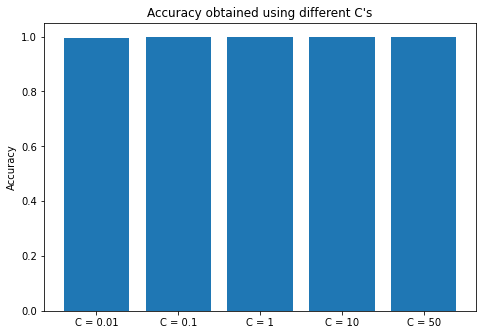

In [ ]:
import matplotlib.pyplot as plt

string_c = ["C = 0.01", "C = 0.1", "C = 1", "C = 10", "C = 50"]
c = [0.01, 0.1, 1, 10, 50]

l = []

for i in c:
  clf = SVC(kernel='linear', C = i)
  clf.fit(train_x, train_y)
  pred_y = clf.predict(valid_x)
  accuracy = metrics.accuracy_score(valid_y, pred_y)
  l.append(accuracy)



fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(string_c,l)
ax.set_title("Accuracy obtained using different C's")
ax.set_ylabel("Accuracy")
plt.show()



**Question 1(d)** (5 marks)

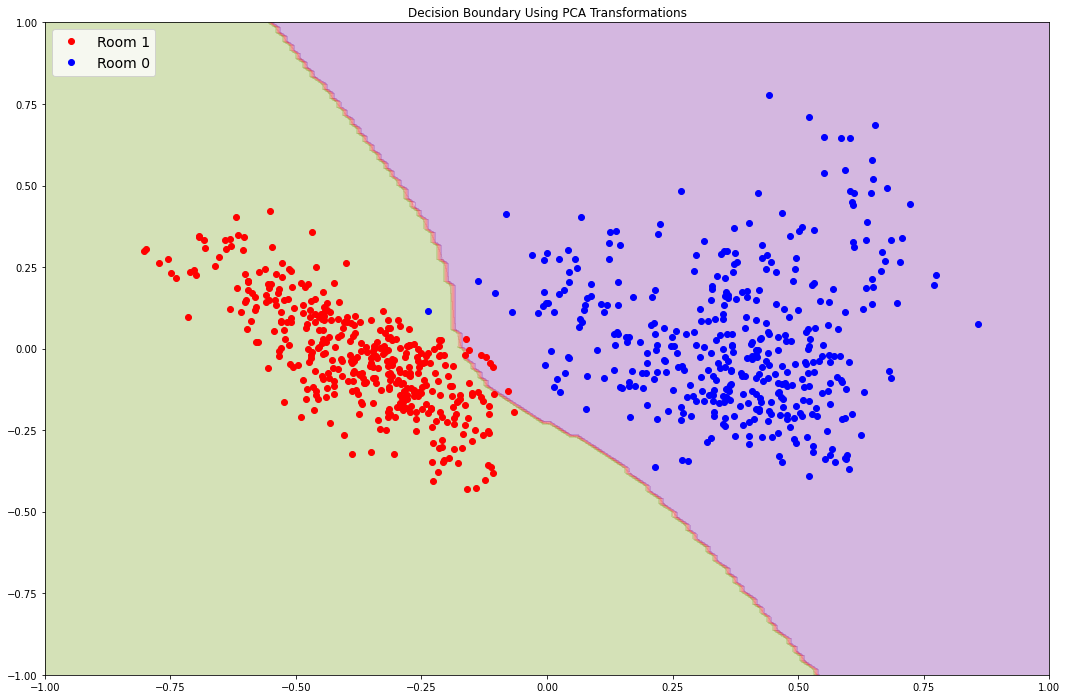

In [ ]:
# Your codes go from here

pca = PCA(n_components =2)
x_reduced = pca.fit_transform(train_x)


x = x_reduced[:, 0]
y = x_reduced[:, 1]


svm_clf = SVC(kernel="poly", C=10, gamma='scale')
svm_clf.fit(x_reduced, train_y)


x0s = np.linspace(-2, 2, 300)
x1s = np.linspace(-2, 2, 300)
x0, x1 = np.meshgrid(x0s, x1s)
X = np.c_[x0.ravel(), x1.ravel()]

Y1_pred = svm_clf.predict(X).reshape(x0.shape)
Y1_decision = svm_clf.decision_function(X).reshape(x0.shape)

# plot results...
plt.figure(1, figsize=(18, 12))
plt.clf()

plt.contourf(x0, x1, Y1_pred, cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0, x1, Y1_decision, cmap=plt.cm.brg, alpha=0.1)
plt.plot(x[train_y==1], y[train_y==1], "ro", label = "Room 1")
plt.plot(x[train_y==0], y[train_y==0], "bo", label = "Room 0")

plt.title('Decision Boundary Using PCA Transformations')
plt.legend(loc="upper left", fontsize=14)
plt.axis([-1, 1, -1, 1])


plt.show()




In [ ]:
'''
# 4. Let us plot the decision boundaries
W = svm_clf.coef_[0]                           # Coefficients
b = svm_clf.intercept_[0]                      # Intercept

# W1*X1 + W2*X2 + b = 0 ===> X2 = -(b + W1*X1)/W2
x0 = np.linspace(-5, 5, 200)
decision_boundary = -W[0]/W[1] * x0 - b/W[1]

# Support Vectors
margin = 2/W[1]
gutter_up = decision_boundary + 0.5*margin
gutter_down = decision_boundary - 0.5*margin
SVS = svm_clf.support_vectors_

# plot results...
plt.figure(1, figsize=(18, 6))
plt.clf()

plt.scatter(SVS[:, 0], SVS[:, 1], s=180, facecolors='#FFAAAA')

plt.plot(x0, decision_boundary, "k-", linewidth=1)
plt.plot(x0, gutter_up, "k--", linewidth=1)
plt.plot(x0, gutter_down, "k--", linewidth=1)


plt.plot(x[train_y==1], y[train_y==1], "bo", label = "Room 1")
plt.plot(x[train_y==0], y[train_y==0], "yo", label = "Room 0")
plt.legend()
plt.axis([-1, 1, -1, 1])
plt.show()
'''

'\n# 4. Let us plot the decision boundaries\nW = svm_clf.coef_[0]                           # Coefficients\nb = svm_clf.intercept_[0]                      # Intercept\n\n# W1*X1 + W2*X2 + b = 0 ===> X2 = -(b + W1*X1)/W2\nx0 = np.linspace(-5, 5, 200)\ndecision_boundary = -W[0]/W[1] * x0 - b/W[1]\n\n# Support Vectors\nmargin = 2/W[1]\ngutter_up = decision_boundary + 0.5*margin\ngutter_down = decision_boundary - 0.5*margin\nSVS = svm_clf.support_vectors_\n\n# plot results...\nplt.figure(1, figsize=(18, 6))\nplt.clf()\n\nplt.scatter(SVS[:, 0], SVS[:, 1], s=180, facecolors=\'#FFAAAA\')\n\nplt.plot(x0, decision_boundary, "k-", linewidth=1)\nplt.plot(x0, gutter_up, "k--", linewidth=1)\nplt.plot(x0, gutter_down, "k--", linewidth=1)\n\n\nplt.plot(x[train_y==1], y[train_y==1], "bo", label = "Room 1")\nplt.plot(x[train_y==0], y[train_y==0], "yo", label = "Room 0")\nplt.legend()\nplt.axis([-1, 1, -1, 1])\nplt.show()\n'